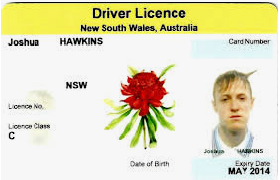

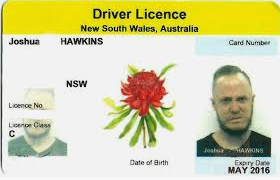

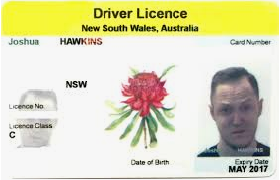

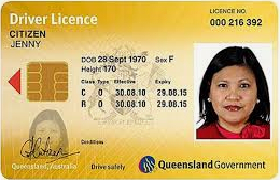

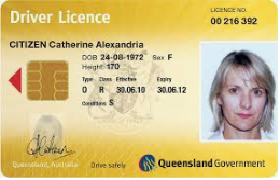

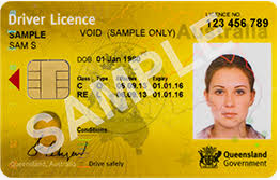

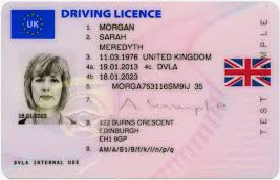

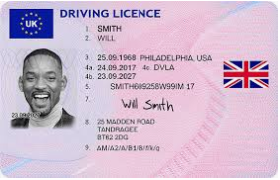

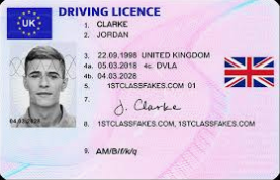

In [199]:
import os
import sys
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
from IPython.display import display

imdirectory = 'C:\\Users\\Yuhang\\Desktop\\scantek\\'
imsize = [280, 180]
imset = []

for filename in os.listdir(imdirectory):
    if 'PNG' in filename:
        im = Image.open(imdirectory+filename).resize(imsize)   
        display(im)
        imset.append(np.array(im))


In [200]:
def imkmeans(imset, k, maxiter=10):
    # initiate stable region
    stableregion = []
    for i in range(k):
        stableregion.append(np.random.rand(imsize[1], imsize[0])>0.5)
        
    # initiate membership
    membership = []
    for i in range(k):
        membership.append([im for idx, im in enumerate(imset) if idx%k==i])
    
    
    for i in range(maxiter):
        print("iter "+str(i))
        center = []
        # with stableregion and membership, update center
        for j in range(k):
            average = np.zeros([imsize[1], imsize[0], 4])
            for im in membership[j]:
                mask = np.stack((stableregion[j], stableregion[j], stableregion[j], stableregion[j]), axis=2).squeeze()
                # print(average.shape,im.shape,mask.shape)
                average = average + im*mask
            average = average/len(membership[j])
            center.append(average)
        center = np.array(center)
        
        # with stableregion and center, update membership
        membership = [[] for i in range(k)]
        for im in imset:
            assign = 0
            mindis = sys.float_info.max
            for j in range(k):
                diff = np.fabs(center[j]-im)
                diff = diff.sum(2)*stableregion[j]
                diff = np.fabs(diff).sum()/stableregion[j].sum()
                
                if diff<mindis:
                    mindis = diff
                    assign = j
                # print(j, stableregion[j].sum())
            
            membership[assign].append(im)

            
        print('groupsize: ', [len(group) for group in membership])

        
        # with membership, update stableregion
        for idx, group in enumerate(membership):
            variance = np.var(group, axis=0).sum(2)            
            median = np.median(variance)
            stableregion[idx] = variance<=median
            print('group ', idx, ' variance: ',variance.sum())
    
    return stableregion, membership

In [201]:
region, grouping = imkmeans(imset,2)

iter 0
groupsize:  [6, 3]
group  0  variance:  324727826.528
group  1  variance:  270909643.778
iter 1
groupsize:  [6, 3]
group  0  variance:  324727826.528
group  1  variance:  270909643.778
iter 2
groupsize:  [6, 3]
group  0  variance:  324727826.528
group  1  variance:  270909643.778
iter 3
groupsize:  [6, 3]
group  0  variance:  324727826.528
group  1  variance:  270909643.778
iter 4
groupsize:  [6, 3]
group  0  variance:  324727826.528
group  1  variance:  270909643.778
iter 5
groupsize:  [6, 3]
group  0  variance:  324727826.528
group  1  variance:  270909643.778
iter 6
groupsize:  [6, 3]
group  0  variance:  324727826.528
group  1  variance:  270909643.778
iter 7
groupsize:  [6, 3]
group  0  variance:  324727826.528
group  1  variance:  270909643.778
iter 8
groupsize:  [6, 3]
group  0  variance:  324727826.528
group  1  variance:  270909643.778
iter 9
groupsize:  [6, 3]
group  0  variance:  324727826.528
group  1  variance:  270909643.778


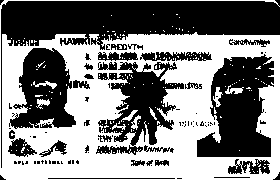

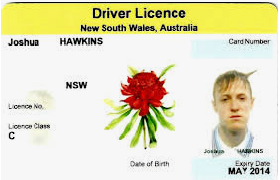

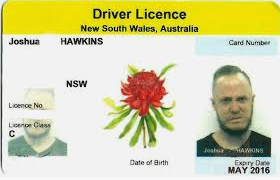

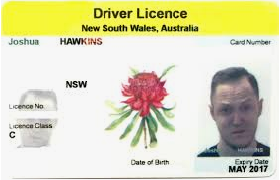

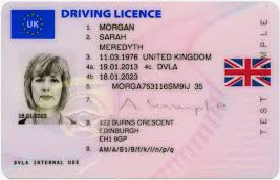

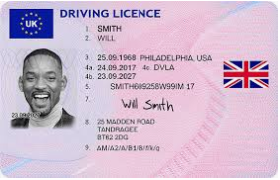

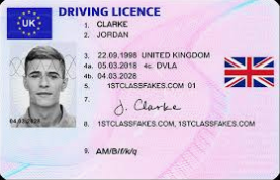

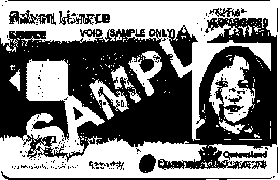

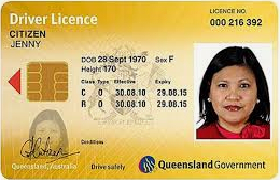

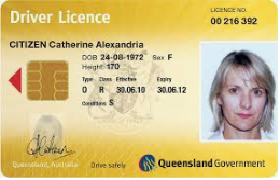

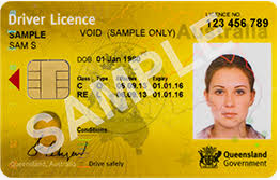

In [202]:
for idx, arr in enumerate(region):
    im = Image.fromarray(arr.astype(np.uint8)*255)
    display(im)
    for imarr  in grouping[idx]:
        im = Image.fromarray(imarr)
        display(im)

In [194]:
[imset[i].max() for i in range(9)]

[255, 255, 255, 255, 255, 255, 255, 255, 255]